

80 Cereals Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df=pd.read_csv('cereal.csv')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.00,5.00,6,280,25,3,1.00,0.33,68.40
1,100% Natural Bran,Q,C,120,3,5,15,2.00,8.00,8,135,0,3,1.00,1.00,33.98
2,All-Bran,K,C,70,4,1,260,9.00,7.00,5,320,25,3,1.00,0.33,59.43
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.00,8.00,0,330,25,3,1.00,0.50,93.70
4,Almond Delight,R,C,110,2,2,200,1.00,14.00,8,-1,25,3,1.00,0.75,34.38


In [4]:
#replace negative value to 0
df.loc[df['potass'] < 0, 'potass'] = 0
df.loc[df['carbo'] < 0, 'carbo'] = 0
df.loc[df['sugars'] < 0, 'sugars'] = 0

In [5]:
#remove dublicate
df.drop_duplicates(inplace=True)

In [6]:
#check null value
df.isnull().sum()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


# EDA

In [8]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,106.88,2.55,1.01,159.68,2.15,14.61,6.94,96.10,28.25,2.21,1.03,0.82,42.67
std,19.48,1.09,1.01,83.83,2.38,4.23,4.42,71.25,22.34,0.83,0.15,0.23,14.05
min,50.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.50,0.25,18.04
25%,100.00,2.00,0.00,130.00,1.00,12.00,3.00,40.00,25.00,1.00,1.00,0.67,33.17
50%,110.00,3.00,1.00,180.00,2.00,14.00,7.00,90.00,25.00,2.00,1.00,0.75,40.40
75%,110.00,3.00,2.00,210.00,3.00,17.00,11.00,120.00,25.00,3.00,1.00,1.00,50.83
max,160.00,6.00,5.00,320.00,14.00,23.00,15.00,330.00,100.00,3.00,1.50,1.50,93.70


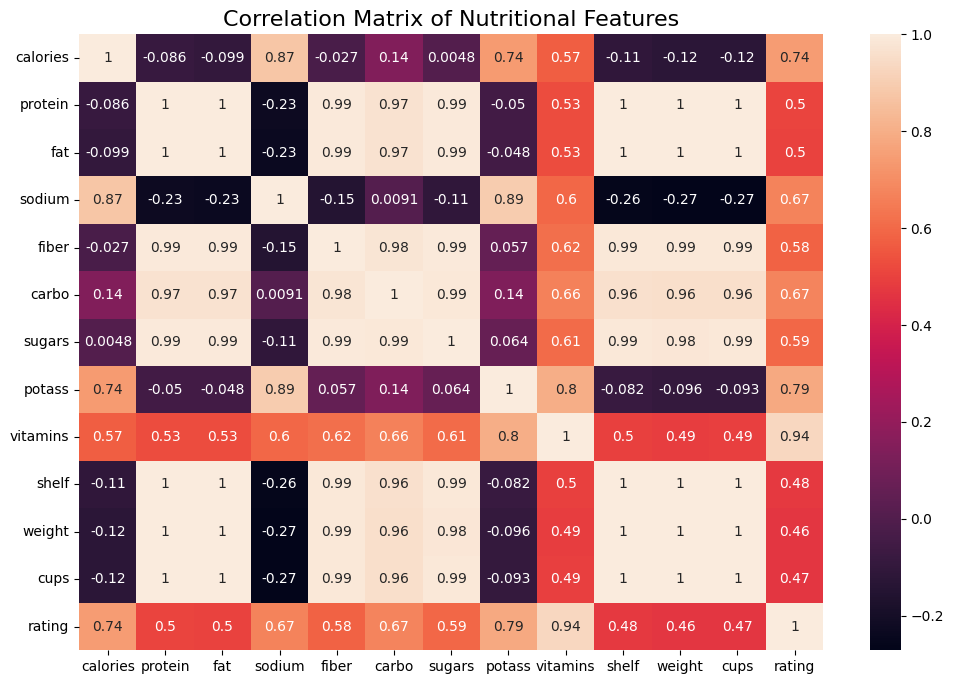

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.describe().corr(), annot=True)
plt.title(' Corrleation Coefficient between numerical columns');
plt.title('Correlation Matrix of Nutritional Features', fontsize=16)
plt.show()

Number of cereals per manufacturer:
 mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


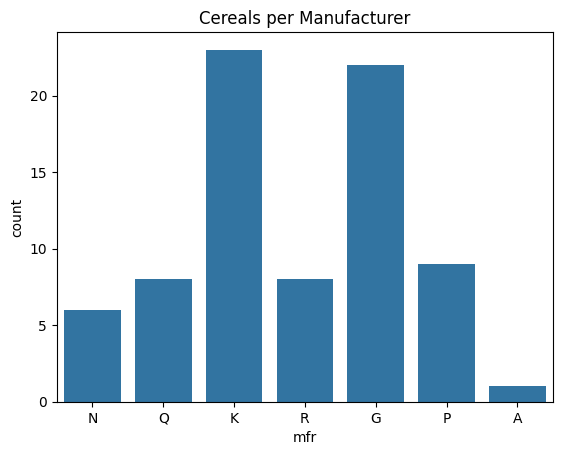

In [10]:
# Which company made the most of cereals
mfr_count = df['mfr'].value_counts()
print("Number of cereals per manufacturer:\n", mfr_count)

# Visualize the distribution of cereals per manufacturer
sns.countplot(x='mfr', data=df)
plt.title('Cereals per Manufacturer')
plt.show()


Cereal with highest fiber:
                          name  fiber
3   All-Bran with Extra Fiber  14.00
0                   100% Bran  10.00
2                    All-Bran   9.00
52      Post Nat. Raisin Bran   6.00
58                Raisin Bran   5.00


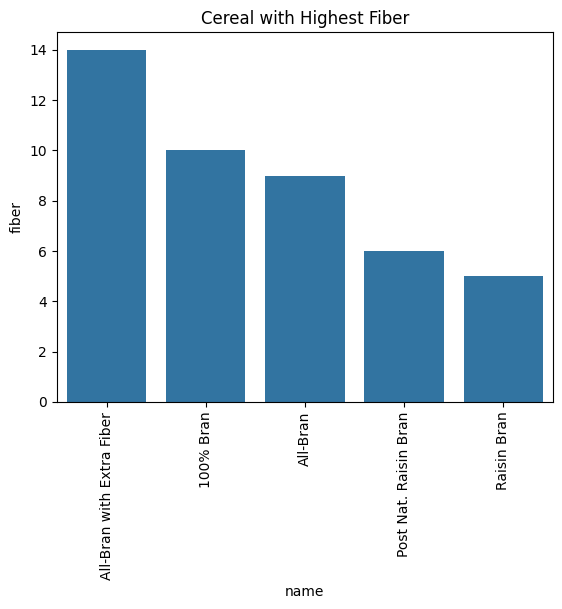

In [24]:
# Cereal with Highest Fiber
max_fiber_cereal = df.sort_values(by='fiber', ascending=False).head(5)
print("Cereal with highest fiber:\n", max_fiber_cereal[['name', 'fiber']])

# Visualization
sns.barplot(x='name', y='fiber', data=max_fiber_cereal)
plt.title('Cereal with Highest Fiber')
plt.xticks(rotation=90)
plt.show()


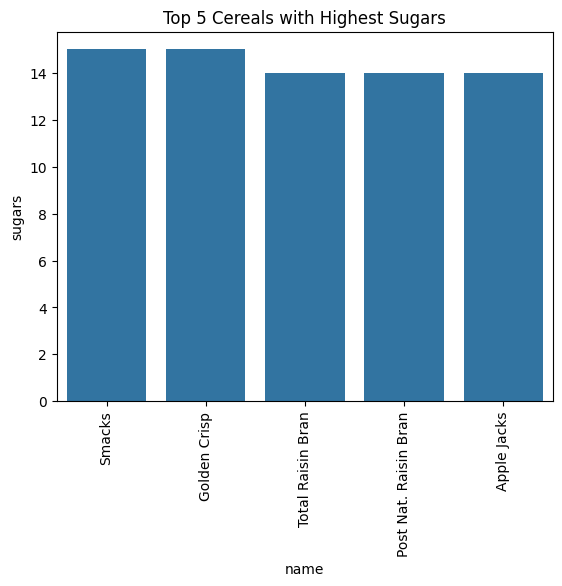

In [39]:
#plot top 5 highst sugars per cereal
top_5_sugars = df.sort_values(by='sugars', ascending=False).head(5)
sns.barplot(x='name', y='sugars', data=top_5_sugars)
plt.title('Top 5 Cereals with Highest Sugars')
plt.xticks(rotation=90)
plt.show()


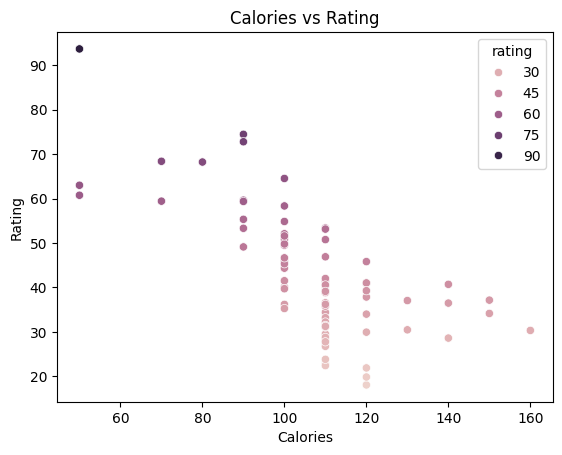

In [29]:
#Calories vs Rating
sns.scatterplot(x='calories', y='rating', data=df, hue='rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.title('Calories vs Rating')
plt.show()



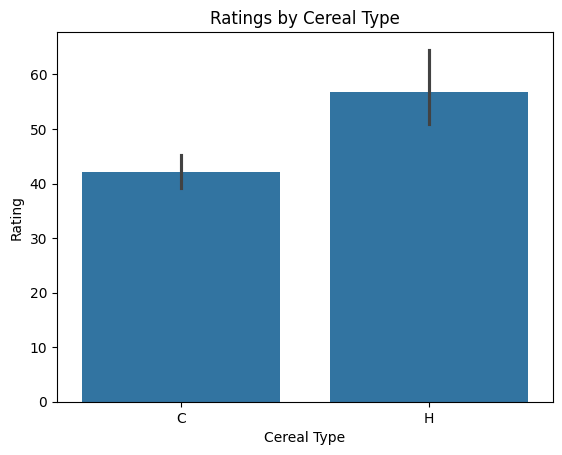

In [13]:
# Ratings by Cereal Type
sns.barplot(x='type', y='rating', data=df)
plt.title('Ratings by Cereal Type')
plt.xlabel('Cereal Type')
plt.ylabel('Rating')
plt.show()


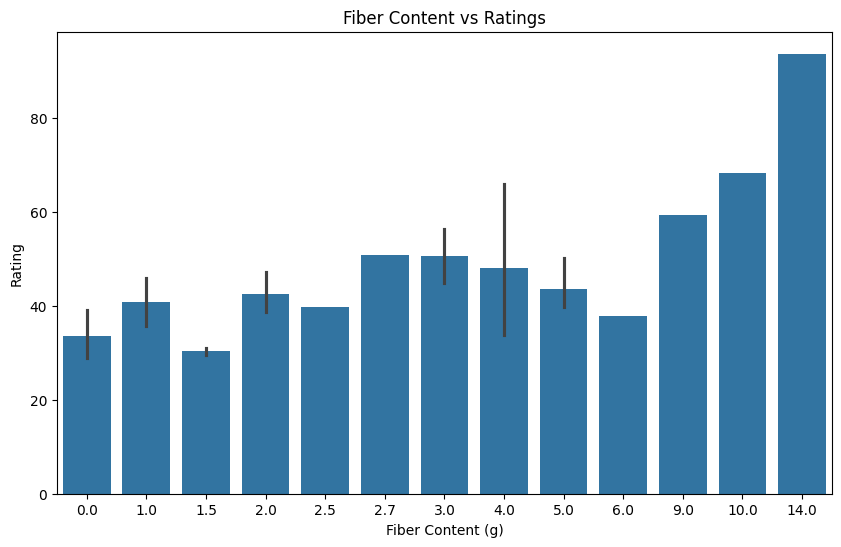

In [15]:
#Fiber Content vs Ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='fiber', y='rating', data=df)
plt.title('Fiber Content vs Ratings')
plt.xlabel('Fiber Content (g)')
plt.ylabel('Rating')
plt.show()


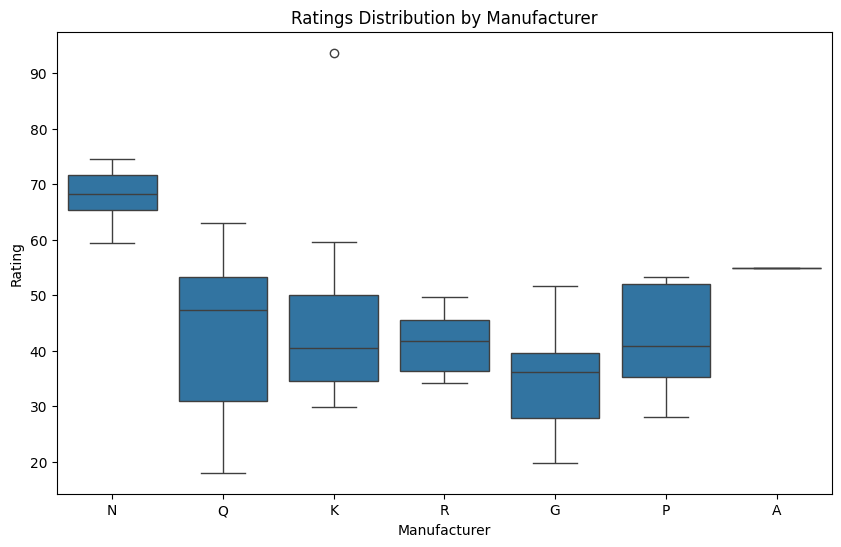

In [19]:
# Ratings Distribution by Manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(x='mfr', y='rating', data=df)
plt.title('Ratings Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Rating')
plt.show()



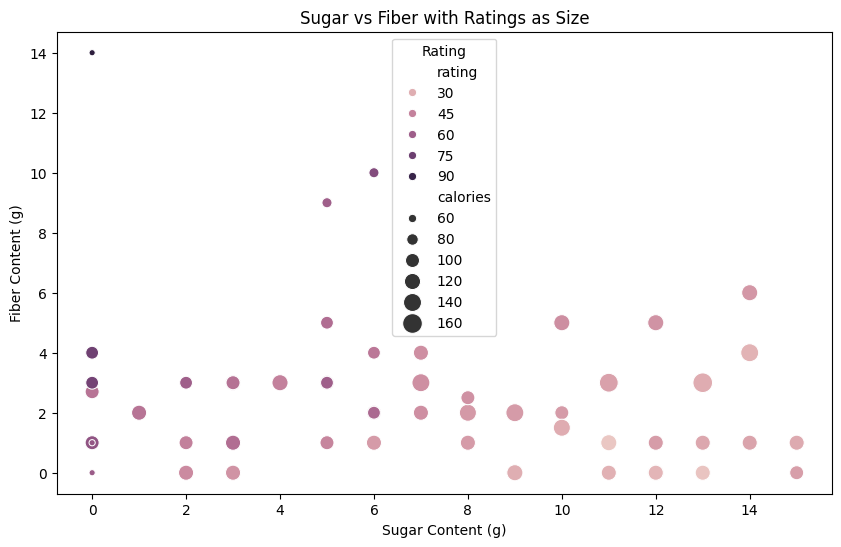

High sodium cereals:
                          name  sodium
2                    All-Bran     260
7                     Basic 4     210
9                 Bran Flakes     210
10               Cap'n'Crunch     220
11                   Cheerios     290
12      Cinnamon Toast Crunch     210
15                  Corn Chex     280
16                Corn Flakes     290
21                    Crispix     220
28              Fruitful Bran     240
31             Golden Grahams     280
35           Honey Graham Ohs     220
36         Honey Nut Cheerios     250
40                        Kix     260
47       Multi-Grain Cheerios     220
49  Nutri-Grain Almond-Raisin     220
53                 Product 19     320
58                Raisin Bran     210
61                  Rice Chex     240
62              Rice Krispies     290
67                  Special K     230
72                    Triples     250
74                 Wheat Chex     230


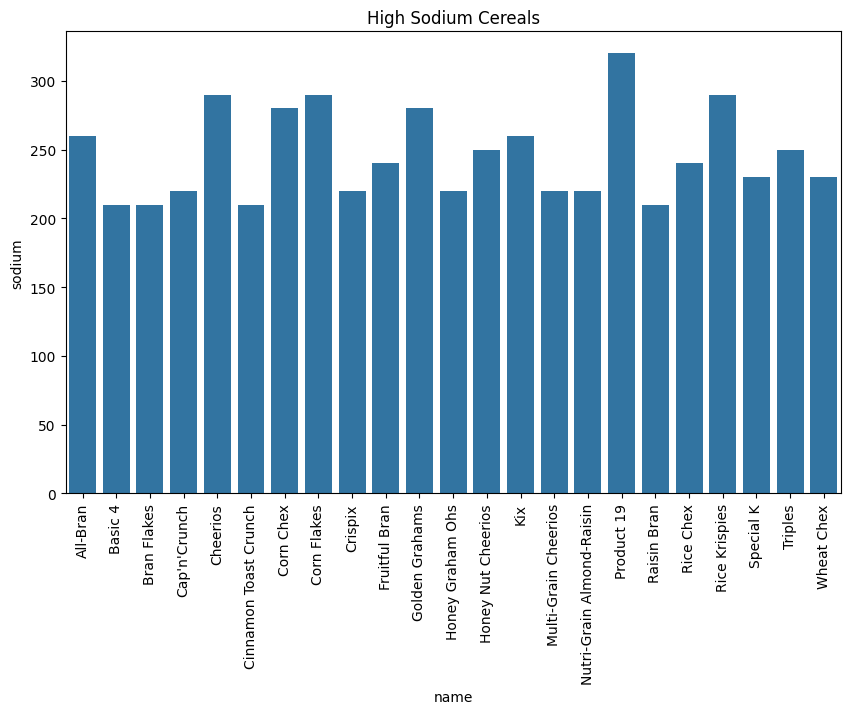

In [21]:
# High Sodium Cereals
high_sodium_cereals = df[df['sodium'] > 200]
print("High sodium cereals:\n", high_sodium_cereals[['name', 'sodium']])

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='name', y='sodium', data=high_sodium_cereals)
plt.title('High Sodium Cereals')
plt.xticks(rotation=90)
plt.show()


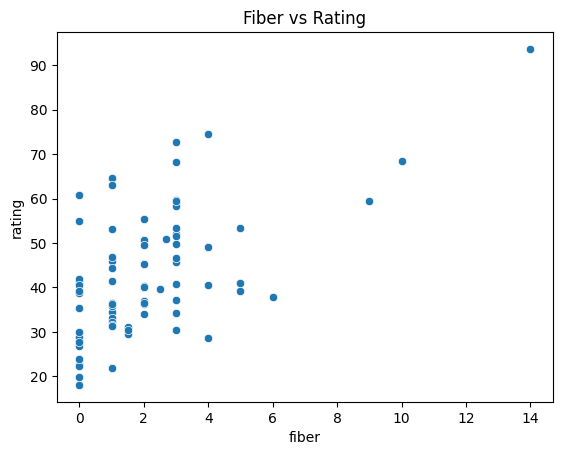

In [30]:
#Fiber vs Rating
sns.scatterplot(x='fiber', y='rating', data=df)
plt.title('Fiber vs Rating')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

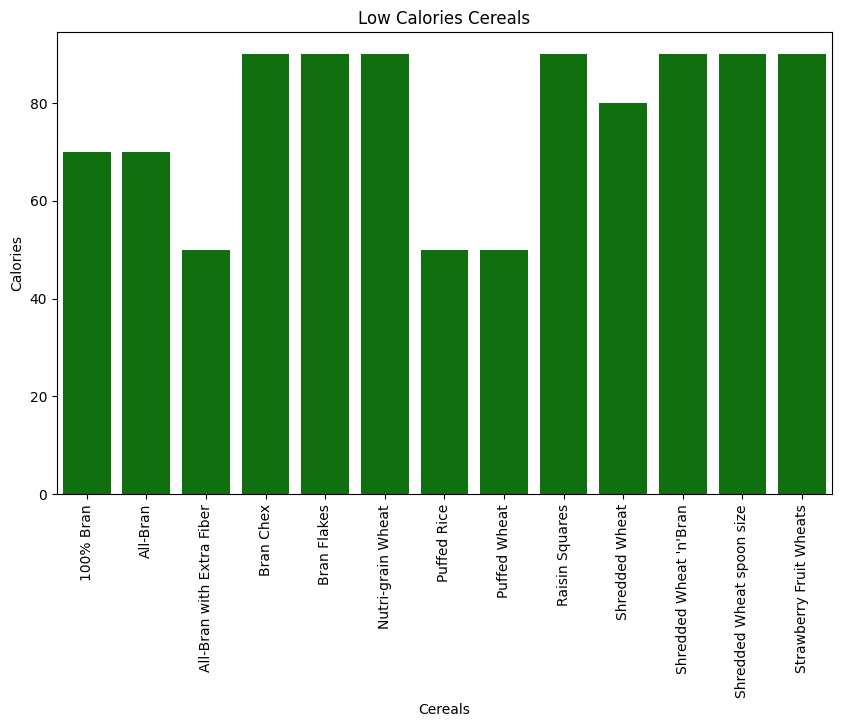

In [34]:
#plot low calories>100

low_cal_cereals = df[df['calories'] < 100][['name', 'calories']]

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='calories', data=low_cal_cereals,color='green')
plt.xlabel('Cereals')
plt.ylabel('Calories')
plt.title('Low Calories Cereals')
plt.xticks(rotation=90)
plt.show